<a href="https://colab.research.google.com/github/novendo-rgb/Water-Potability-Prediction/blob/main/Water_Potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [30]:
pip install miceforest

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Read Dataset

In [32]:
dataset= pd.read_csv('water_potability.csv')

In [33]:
dataset.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# Data Cleaning

Check The Missing Values and Duplicated Values

In [35]:
print("Duplicated Value: ", dataset.duplicated().sum())
dataset.isnull().sum()

Duplicated Value:  0


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

##Handling Missing values

###Distribution data for all columns with NaN Values

Examining the data distributions of all columns with missing values.

In [36]:
sns.histplot(dataset['ph'], kde=True)
plt.title(f'Distribution of pH before Handling Missing Values with {dataset["ph"].skew():.2f} Skewness')
plt.xlabel('pH')

Text(0.5, 0, 'pH')

In [37]:
sns.histplot(dataset['Sulfate'], kde=True)
plt.title(f'Distribution of Sulfate before Handling Missing Values with {dataset["Sulfate"].skew():.2f} Skewness')
plt.xlabel('Sulfate')

Text(0.5, 0, 'Sulfate')

Text(0.5, 0, 'Trihalomethanes')

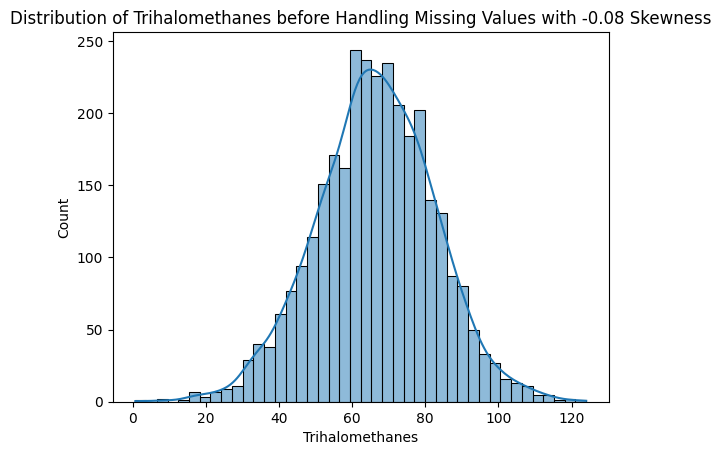

In [38]:
sns.histplot(dataset['Trihalomethanes'], kde=True)
plt.title(f'Distribution of Trihalomethanes before Handling Missing Values with {dataset["Trihalomethanes"].skew():.2f} Skewness')
plt.xlabel('Trihalomethanes')

###Missing Values Treatment

Based on the skewness results of the three features, the distributions are approximately symmetric, so mean imputation would generally be appropriate. However, because there are many missing values, mean and median imputation methods may cause a spike in the distribution since they replace missing values with a single constant value. Therefore, using MICE (Multiple Imputation by Chained Equations) is better, as it fills in missing values by iteratively predicting them based on patterns from other features.

In [39]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='median')
# imputer.fit(dataset.iloc[:, [0,4,7]])
# dataset.iloc[:, [0,4,7]]=imputer.transform(dataset.iloc[:, [0, 4, 7]])

In [40]:
from miceforest import ImputationKernel

mice_kernel = ImputationKernel(
data = dataset.iloc[:, [0,4,7]],
random_state = 0
)
mice_kernel.mice(2)
mice_imputation = mice_kernel.complete_data()
dataset.iloc[:, [0,4,7]] = mice_imputation


In [41]:
dataset.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

###Distribution Data for All Category with NaN Values after Treatment

In [42]:
sns.histplot(dataset['ph'], kde=True)
plt.title(f'Distribution of ph After Handling Missing Values with {dataset["ph"].skew():.2f} Skewness')
plt.xlabel('pH')

Text(0.5, 0, 'pH')

Text(0.5, 0, 'Sulfate')

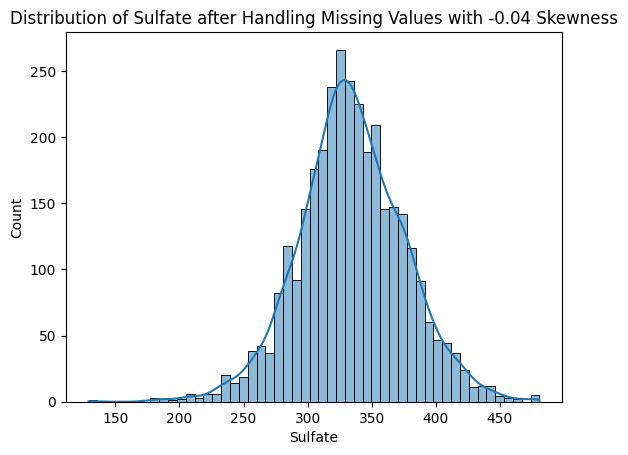

In [43]:
sns.histplot(dataset['Sulfate'], kde=True)
plt.title(f'Distribution of Sulfate after Handling Missing Values with {dataset["Sulfate"].skew():.2f} Skewness')
plt.xlabel('Sulfate')

Text(0.5, 0, 'Trihalomethanes')

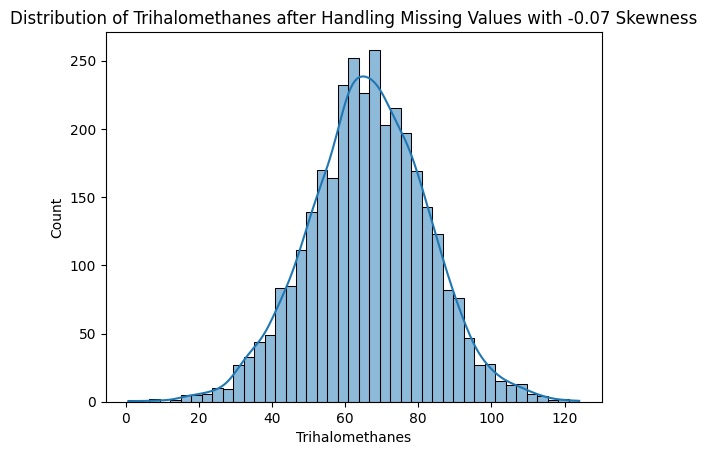

In [44]:
sns.histplot(dataset['Trihalomethanes'], kde=True)
plt.title(f'Distribution of Trihalomethanes after Handling Missing Values with {dataset["Trihalomethanes"].skew():.2f} Skewness')
plt.xlabel('Trihalomethanes')

##Exclude Non Features Columns

In [45]:
features = dataset.drop('Potability',axis=1).columns.tolist()

#EDA

All features in this dataset contain numeric data types, therefore the exploratory analysis focuses solely on numerical features and categorical target.

##Univariate Analysis



###Descriptive Statistics

In [46]:
dataset.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.083159   196.369496  22014.092526     7.122277   334.307437   
std       1.594189    32.879761   8768.570828     1.583085    41.221625   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.100096   176.850538  15666.690297     6.127421   308.923989   
50%       7.037422   196.967627  20927.833607     7.130299   333.439570   
75%       8.064824   216.667456  27332.762127     8.114887   360.528789   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.294361     3.966786     0.390110  
std       80.824064        3.308162        16.144395     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.789190     3.439711     0.000000  
50%      421.884968       14.218338        66.482041     3.955028     0.000000  
75%      481.792304       16.557652        77.267739     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

###Distribution Analysis

####Histogram for Features

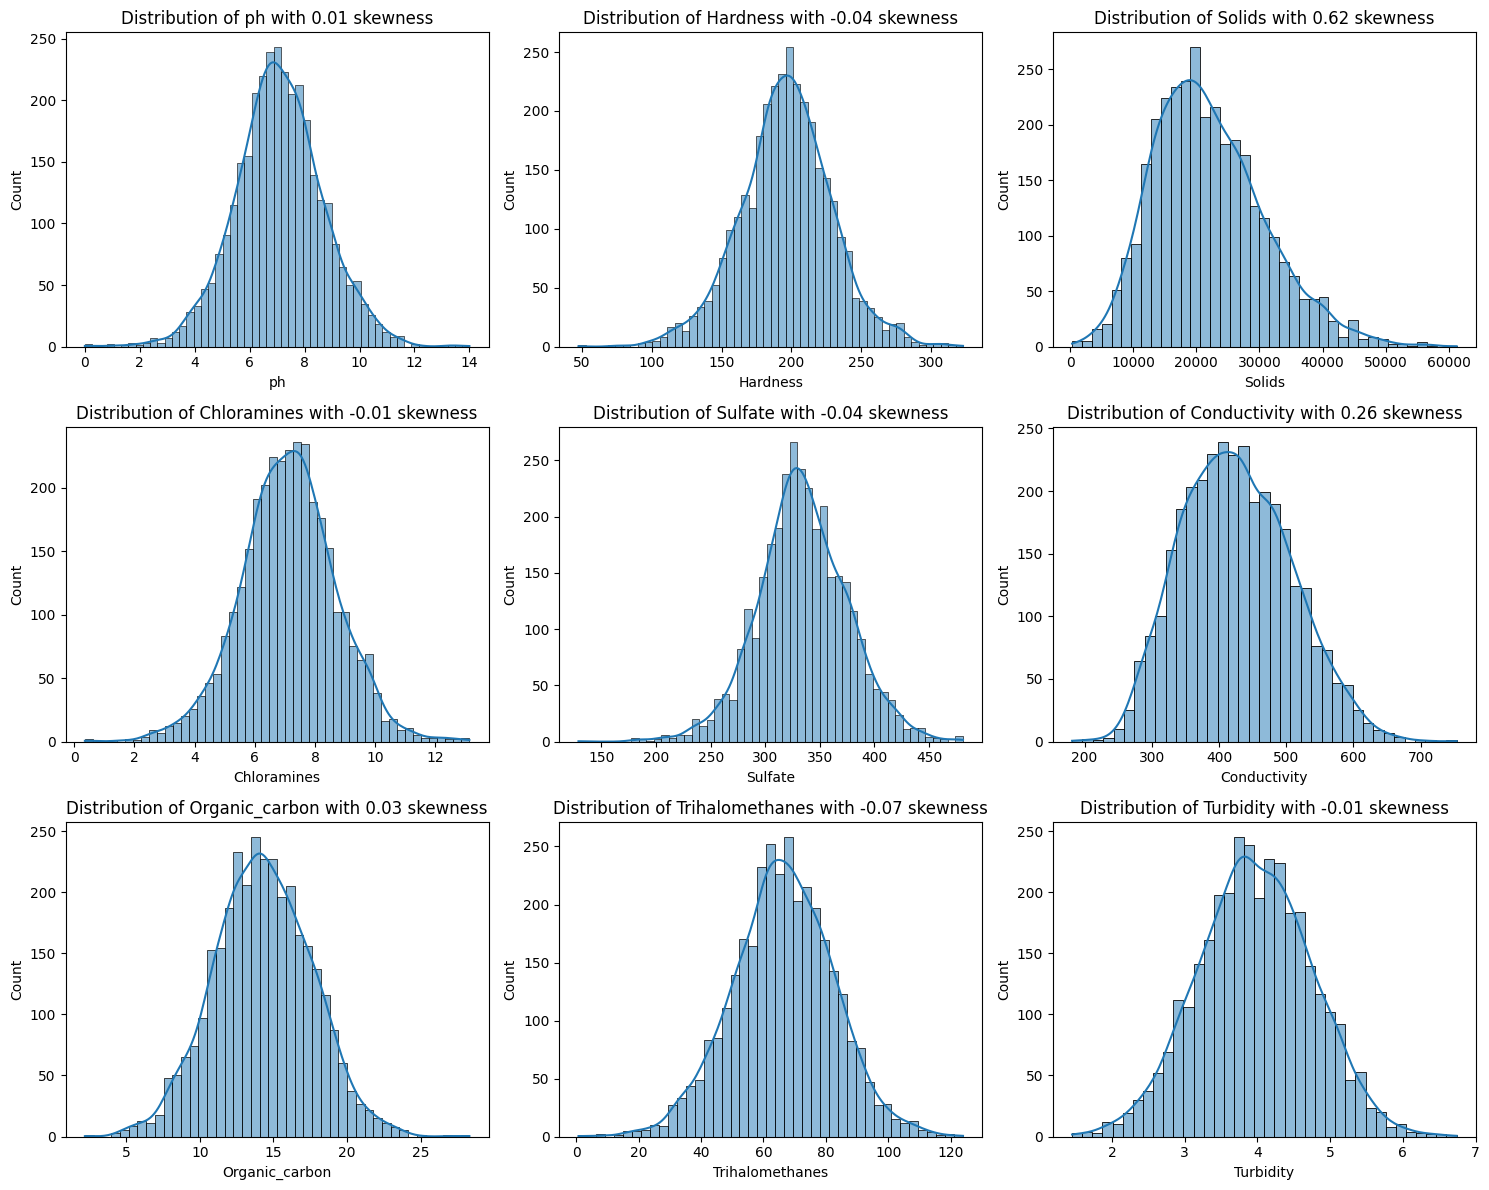

In [47]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
for idx, feature in enumerate(features):
  row = idx // 3
  col = idx % 3
  sns.histplot(data=dataset, x=feature, kde=True, ax=axes[row, col])
  axes[row, col].set_title(f'Distribution of {feature} with {dataset[feature].skew():.2f} skewness')
plt.tight_layout()
plt.show()


####Boxplot for Features

In [48]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
for idx, feature in enumerate(features):
  row = idx // 3
  col = idx % 3
  sns.boxplot(data=dataset, y=feature, ax=axes[row, col])
  axes[row, col].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


###Analysis of Categorical Target

###Countplot for Categorical Target


<Axes: xlabel='Potability', ylabel='count'>

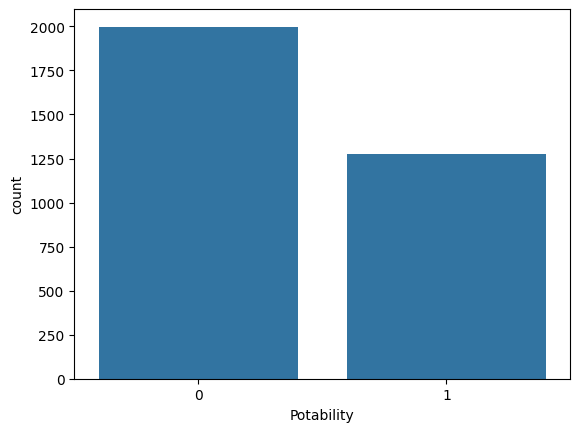

In [49]:
sns.countplot(dataset, x='Potability')

##Bivariate Analysis

###Feature Relationship with Potability

#### Distribution of each feature by target with Boxplot

In [50]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
for idx, feature in enumerate(features):
  row = idx // 3
  col = idx % 3
  sns.boxplot(data=dataset, x=dataset['Potability'],y=feature, ax=axes[row, col])
  axes[row, col].set_title(f'Distribution of {feature} by Potability')
plt.tight_layout()
plt.show()


#### Distribution of each feature by target with Violinplot

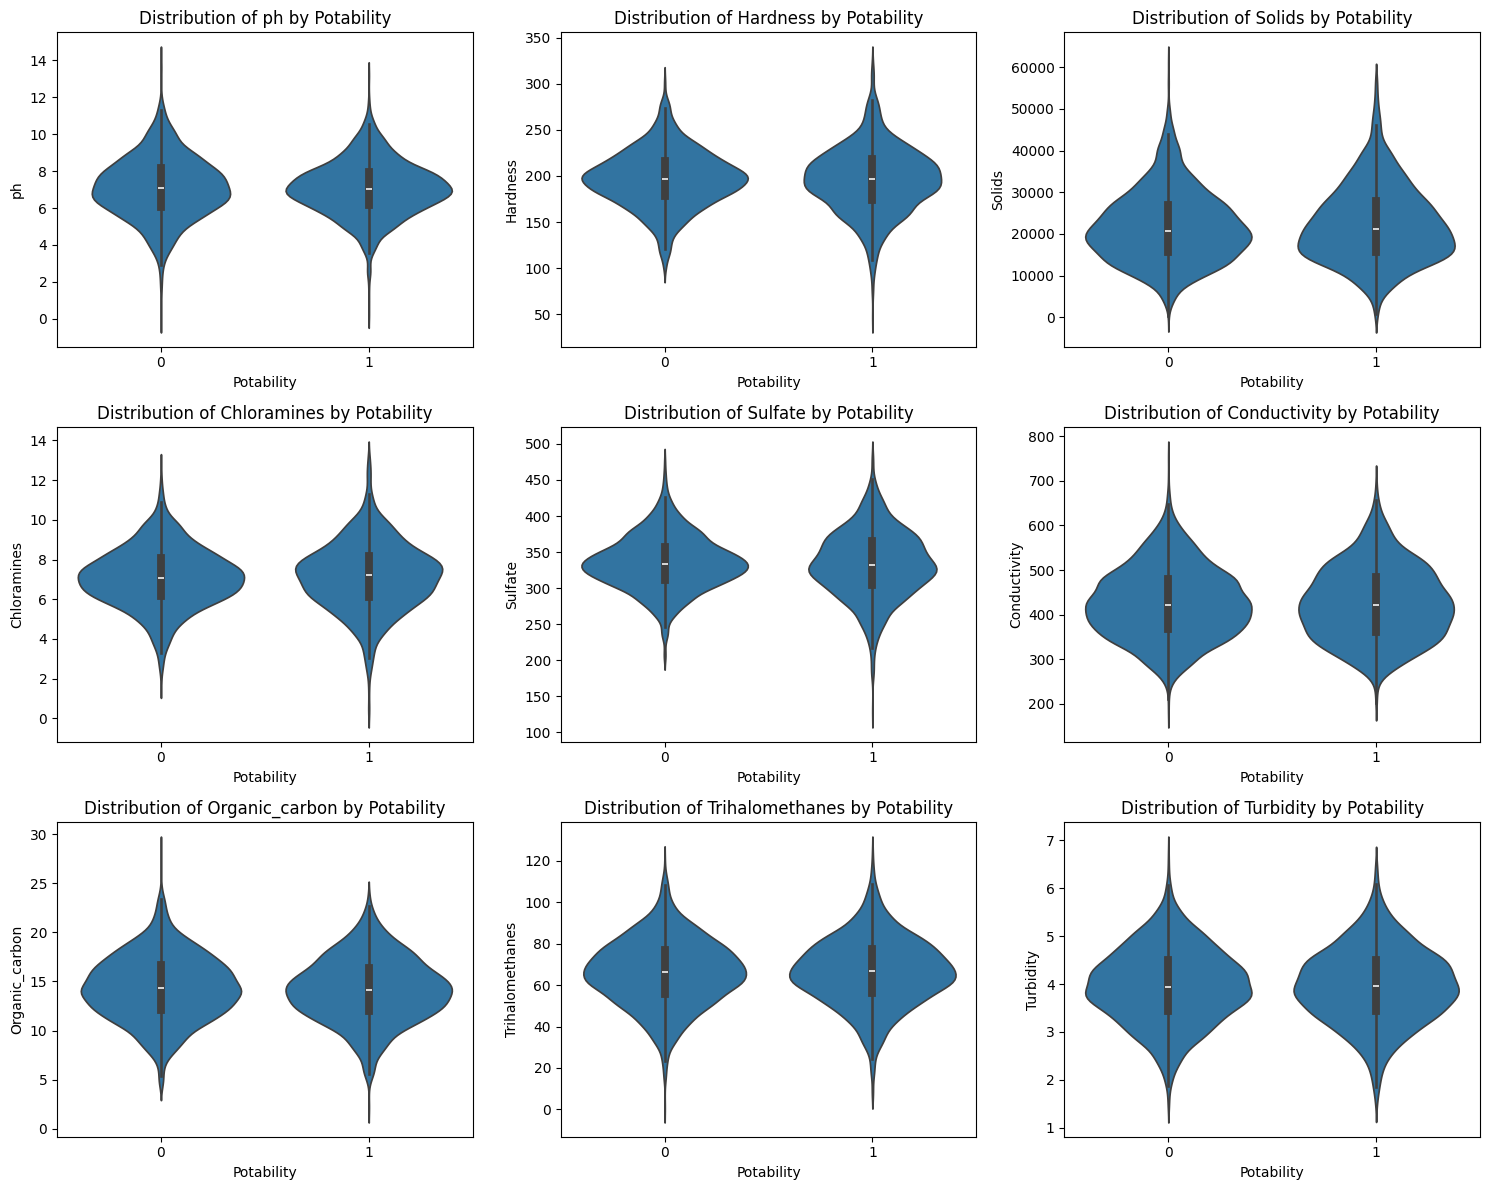

In [51]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
for idx, feature in enumerate(features):
  row = idx // 3
  col = idx % 3
  sns.violinplot(data=dataset, x=dataset['Potability'],y=feature, ax=axes[row, col])
  axes[row, col].set_title(f'Distribution of {feature} by Potability')
plt.tight_layout()
plt.show()


#### Distribution of each feature by target with Barplot

In [52]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
for idx, feature in enumerate(features):
  row = idx // 3
  col = idx % 3
  sns.barplot(data=dataset, x=dataset['Potability'],y=feature, ax=axes[row, col])
  axes[row, col].set_title(f'Distribution of {feature} by Potability')
plt.tight_layout()
plt.show()


#### Distribution of each feature by target with Histplot

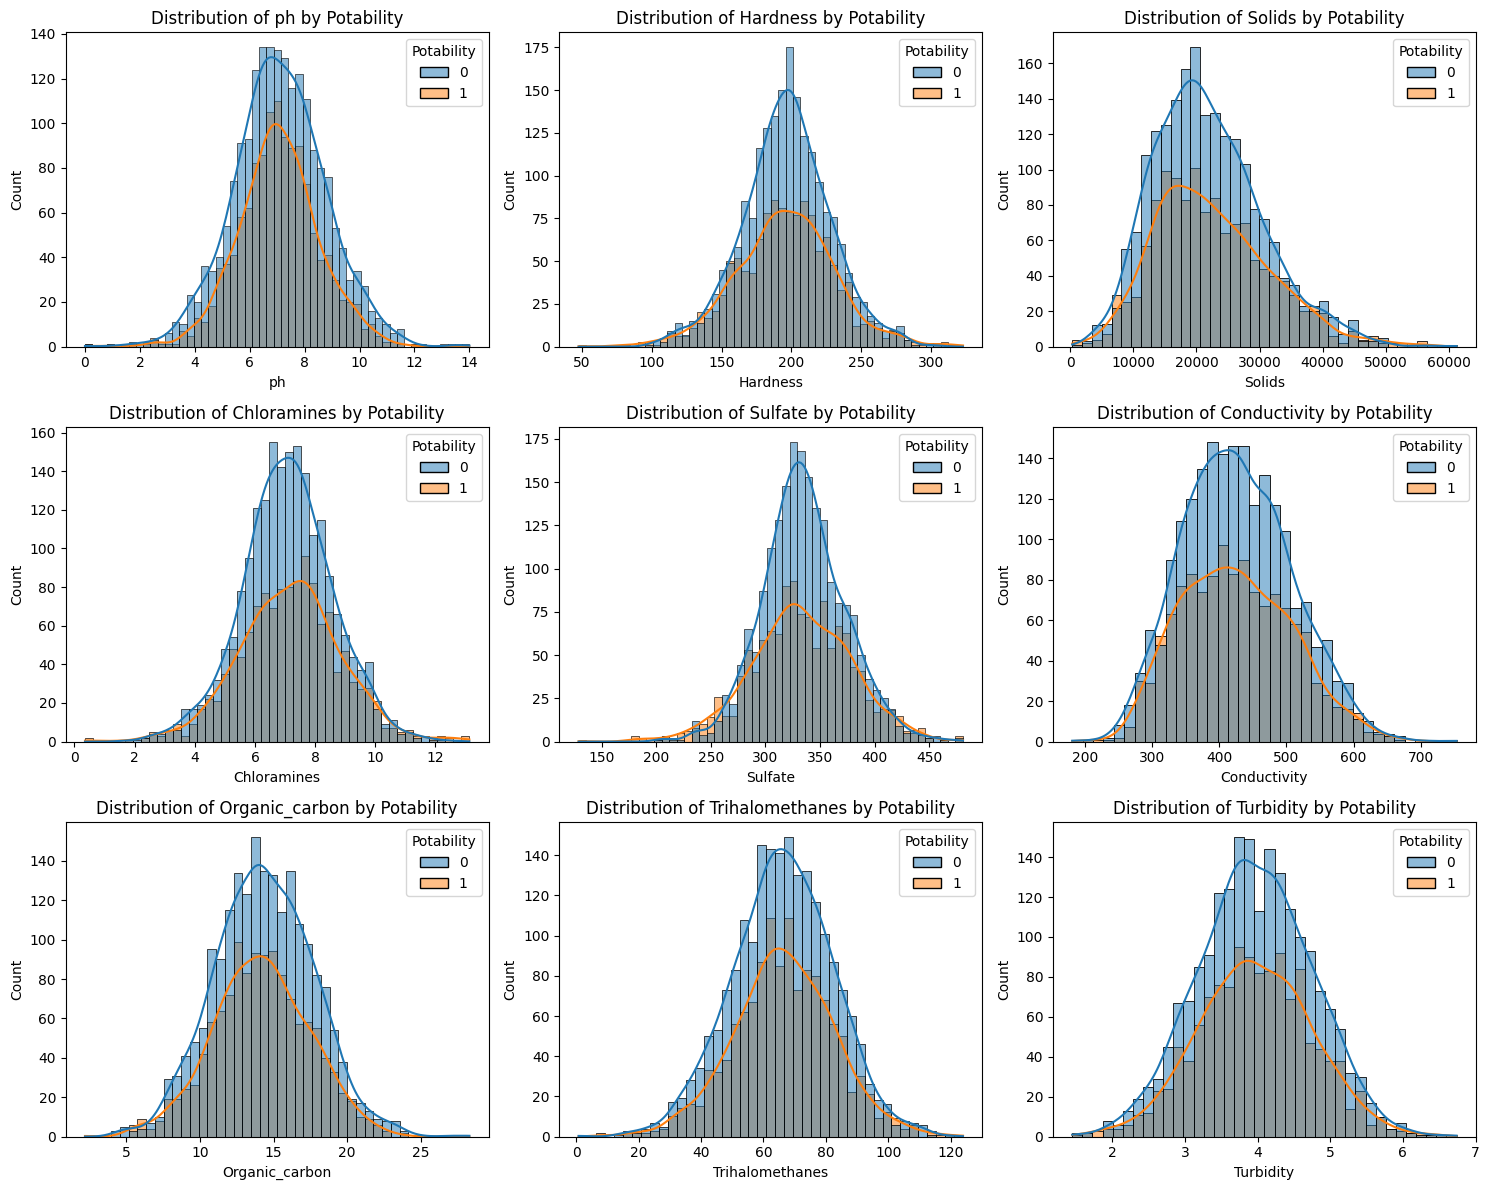

In [53]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
for idx, feature in enumerate(features):
  row = idx // 3
  col = idx % 3
  sns.histplot(data=dataset, x=feature, hue='Potability',kde=True, ax=axes[row, col])
  axes[row, col].set_title(f'Distribution of {feature} by Potability')
plt.tight_layout()
plt.show()


####Mutual Information
Because the dataset is large, it is difficult to visualize data patterns using plots. Therefore, we use Mutual Information to describe the relationship between the features and the target.

In [54]:
from sklearn.feature_selection import mutual_info_classif


Mutual_Information = mutual_info_classif(dataset[features], dataset['Potability'])
print("Mutual Information for each feature:", Mutual_Information)

Mutual Information for each feature: [0.         0.02655975 0.0010659  0.         0.01630143 0.00707724
 0.00401388 0.         0.00307518]


##Multivariate Analysis

###PairPlot

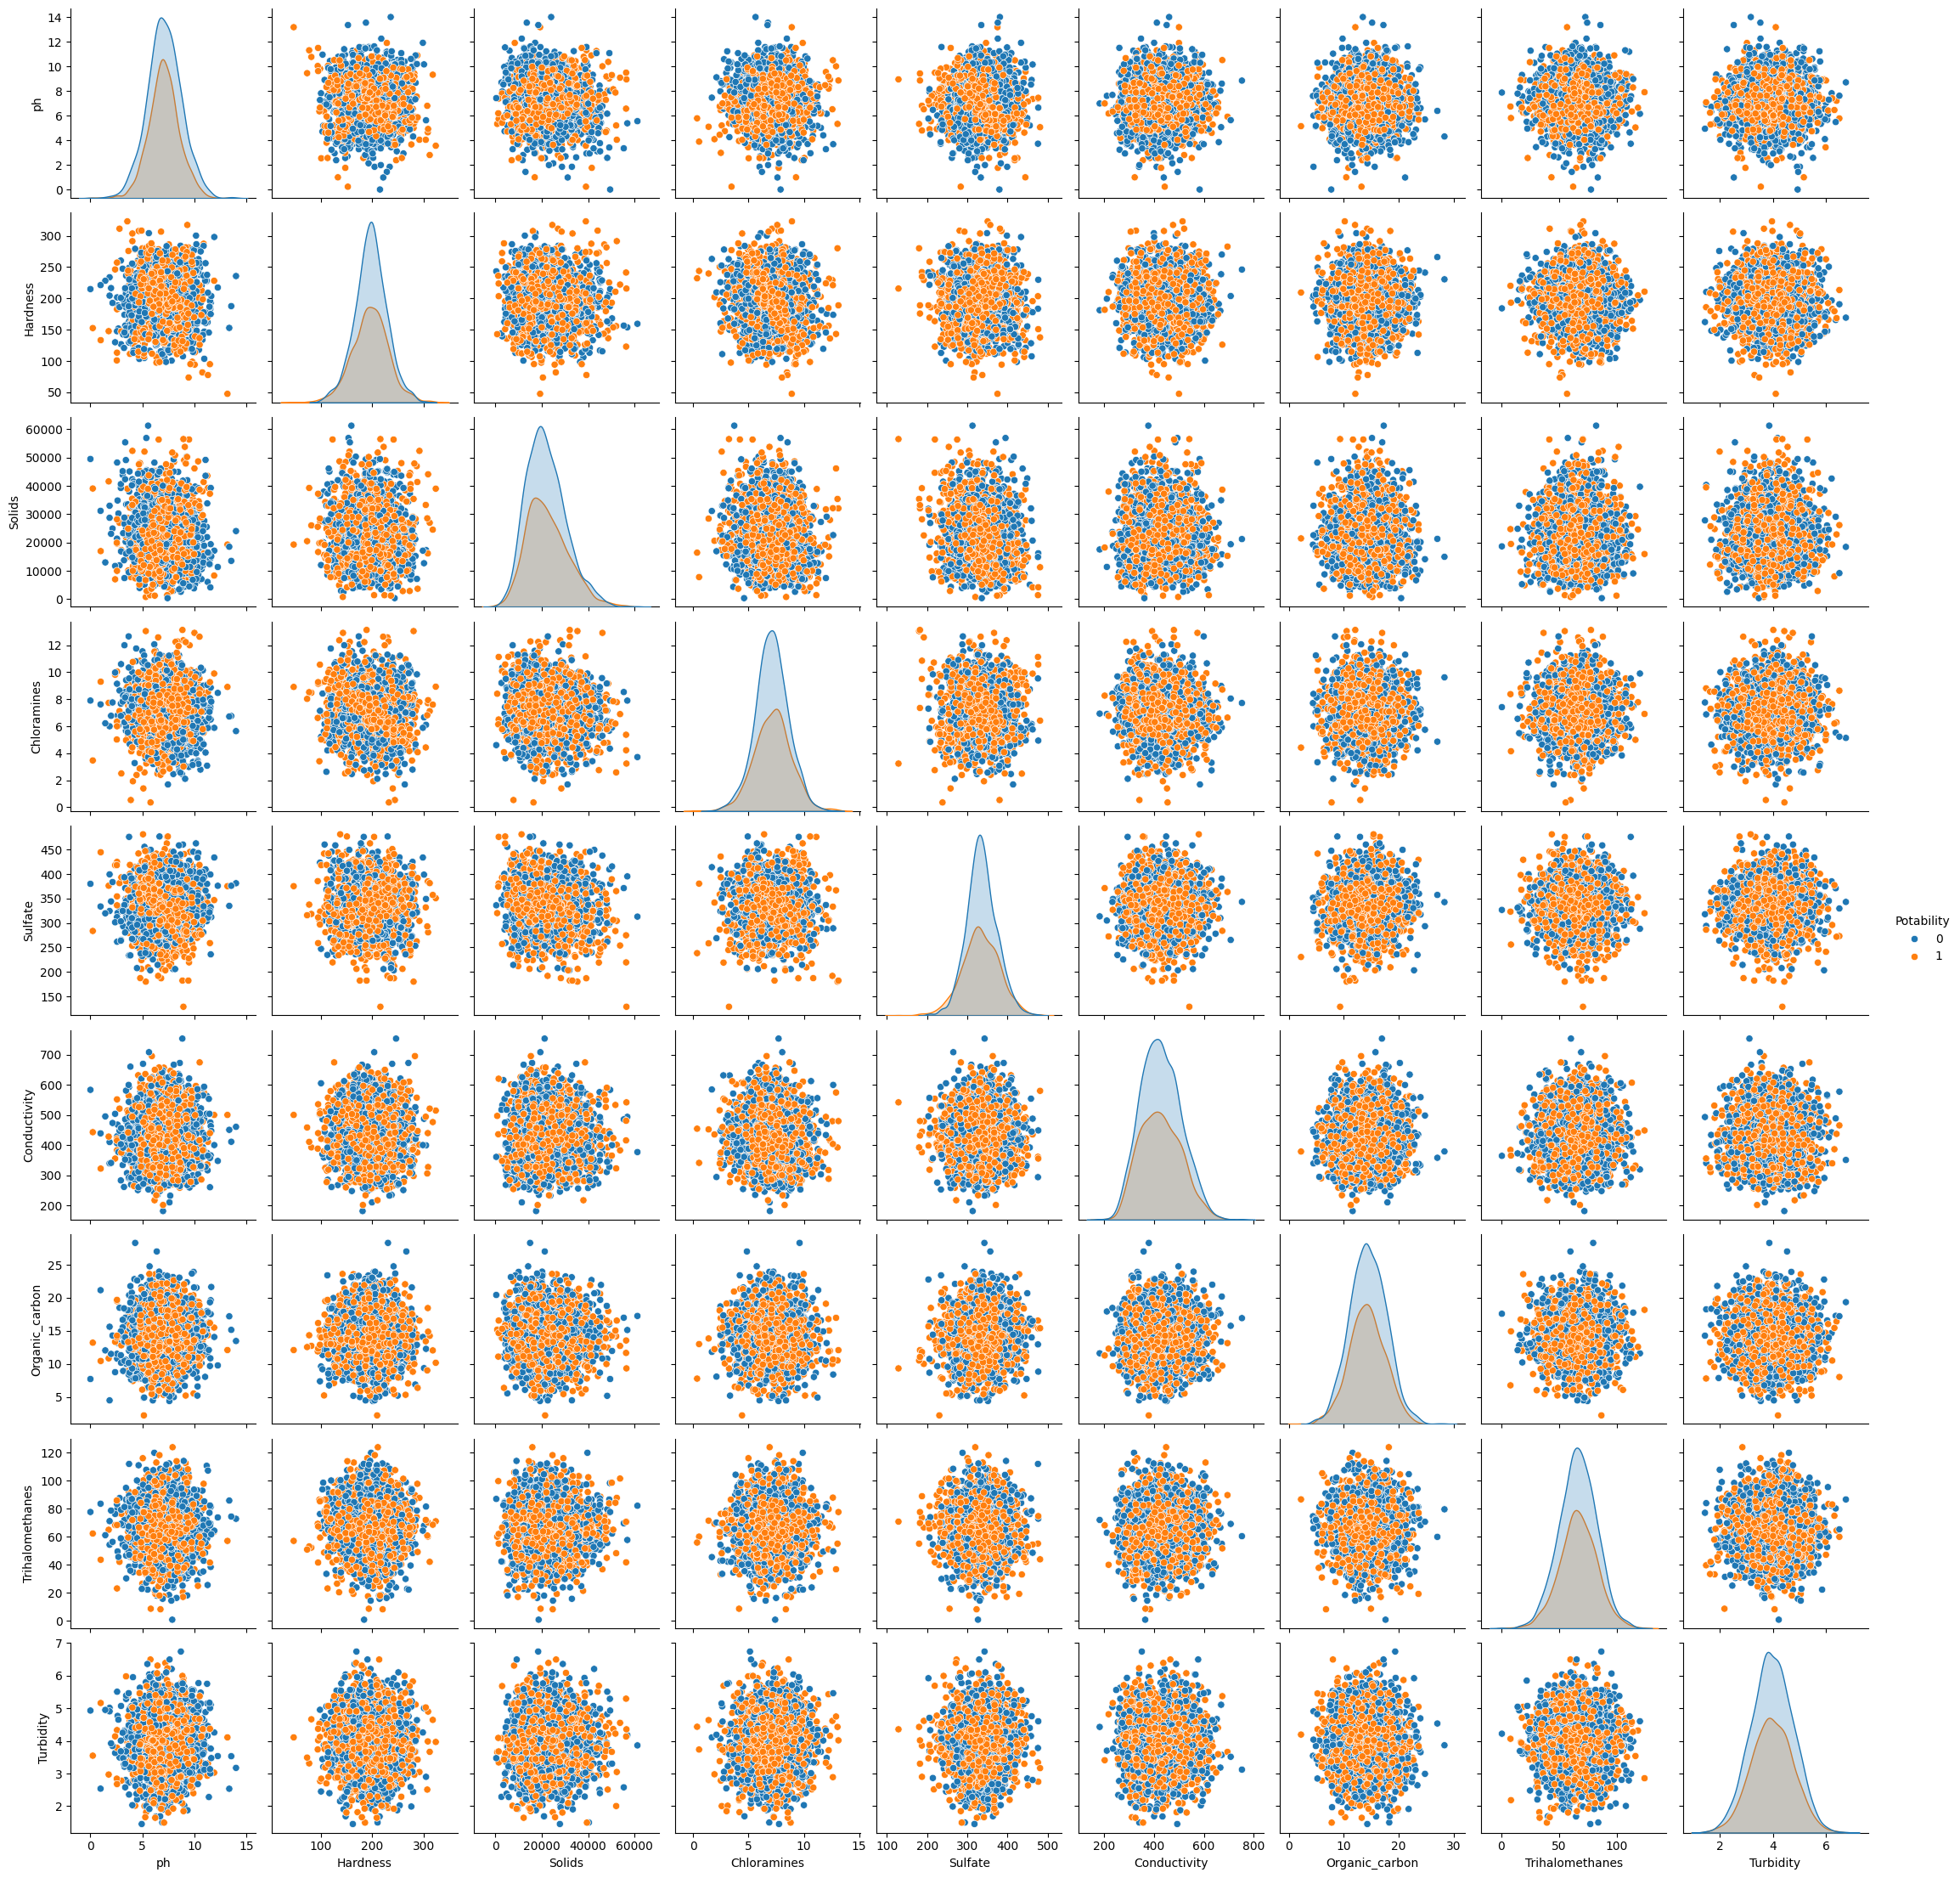

In [55]:
sns.pairplot(dataset,hue='Potability')

###Correlation Matrix

In [56]:
dataset[features].corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.069079 -0.080506    -0.040939  0.039608   
Hardness         0.069079  1.000000 -0.046899    -0.030054 -0.063222   
Solids          -0.080506 -0.046899  1.000000    -0.070148 -0.129135   
Chloramines     -0.040939 -0.030054 -0.070148     1.000000  0.016159   
Sulfate          0.039608 -0.063222 -0.129135     0.016159  1.000000   
Conductivity     0.013617 -0.023915  0.013831    -0.020486 -0.012197   
Organic_carbon   0.039072  0.003610  0.010242    -0.012653  0.032553   
Trihalomethanes  0.015377 -0.014055 -0.005660     0.015416 -0.037849   
Turbidity       -0.027072 -0.014449  0.019546     0.002363 -0.001649   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
ph                   0.013617        0.039072         0.015377  -0.027072  
Hardness            -0.023915        0.003610        -0.014055  -0.014449  
Solids               0.013831        0.010242        -0.005660   0.019546  
Chloramines         -0.020486       -0.012653         0.015416   0.002363  
Sulfate             -0.012197        0.032553        -0.037849  -0.001649  
Conductivity         1.000000        0.020966        -0.005413   0.005798  
Organic_carbon       0.020966        1.000000        -0.010660  -0.027308  
Trihalomethanes     -0.005413       -0.010660         1.000000  -0.022417  
Turbidity            0.005798       -0.027308        -0.022417   1.000000

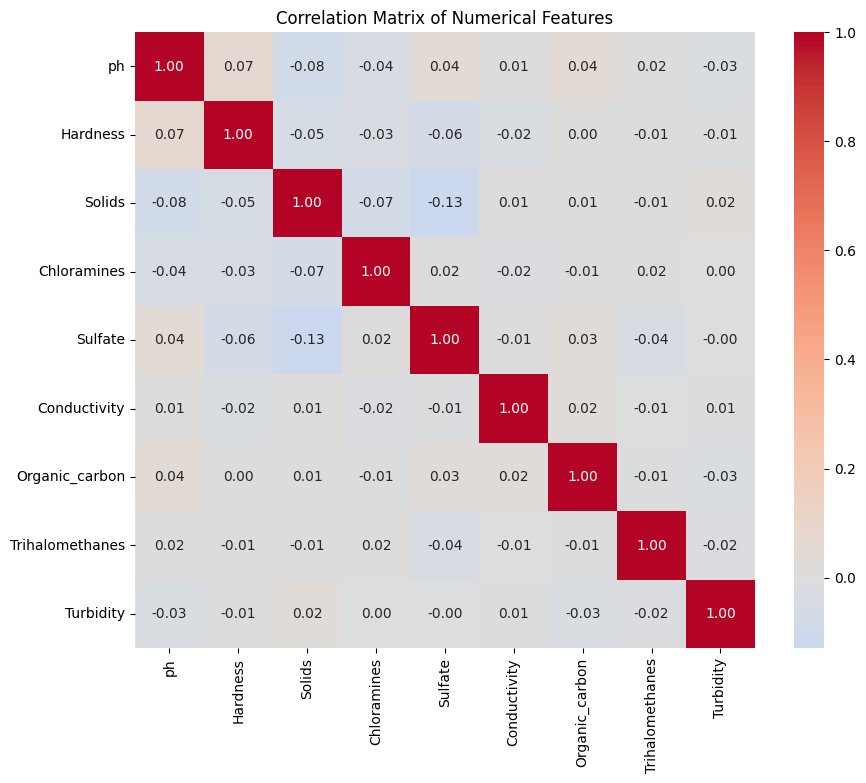

In [57]:
corr_matrix = dataset[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f",center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Since there is no strong linear correlation with the target variable, it is possible that a non-linear relationship is present.

#Model Preparation

##Splitting the dataset into Training and Test sets

In [58]:
from sklearn.model_selection import train_test_split
X=dataset.iloc[:,:-1].values #Take all column except the last column as X or feature variables
y=dataset.iloc[:, -1].values #Take the last column as y or target variable

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.25, random_state=101) #Split the train set and test set with the proportion of 75% for training data and 25% for test data

In [59]:
print(y)

[0 0 0 ... 1 1 1]


##Feature Scaling

Feature scaling is used to normalize the range of independent variables in a dataset so that they contribute equally to a model’s learning. This is important because many machine learning algorithms—like gradient descent, k-nearest neighbors, and support vector machines—perform better or converge faster when features are on a similar scale. Without scaling, features with larger ranges could dominate others and distort the model’s performance.

In [60]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()

X_train_scaled =sc_x.fit_transform(X_train)
X_test_scaled= sc_x.transform(X_test)

#Modeling

##K-NN

###Model Building

####GridSearch CV

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier() #Define the KNN Model

# Grid the parameter
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # The total of neighbors
    'weights': ['uniform', 'distance'],  # The weight
    'metric': ['euclidean', 'manhattan',]  # Distance Method
}

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Show the best result
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best Accuracy: 0.6267862169456725


####Training the K-NN models on the Training Set

In [62]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors= 9, metric="manhattan", weights= "uniform")
classifier.fit(X_train_scaled,y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=9)

####K-Fold Cross Validation

In [63]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train_scaled, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 62.23 %
Standard Deviation: 2.44 %


####Predicting the Test set

In [64]:
prediction = classifier.predict(X_test_scaled)

In [65]:
y_pred = classifier.predict(X_test_scaled)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [0 0]
 [0 1]
 ...
 [0 0]
 [0 1]
 [1 0]]


###Evaluation Model

####Confusion Matrix and Accuracy Score

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(y_test,prediction)
print(cm)
accuracy_score(y_test,prediction)

[[418  88]
 [212 101]]


0.6336996336996337

####Classification Report

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.66      0.83      0.74       506
           1       0.53      0.32      0.40       313

    accuracy                           0.63       819
   macro avg       0.60      0.57      0.57       819
weighted avg       0.61      0.63      0.61       819



####Train and Test Accuracy

In [68]:
train_acc=classifier.score(X_train_scaled,y_train)
test_acc=classifier.score(X_test_scaled,y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy: 0.7155
Test Accuracy: 0.6337


##SVM

###Model Building

####GridsSearchCV

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svm=SVC()
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = svm,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train_scaled, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 66.67 %
Best Parameters: {'C': 0.75, 'gamma': 0.1, 'kernel': 'rbf'}


####Training the SVM Model on the Training Set

In [78]:
from sklearn.svm import SVC
svm = SVC(C= 0.75, gamma=0.1, kernel='rbf', random_state=0)
svm.fit(X_train_scaled,y_train)

SVC(C=0.75, gamma=0.1, random_state=0)

####K-Fold Cross Validation

In [79]:
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score (estimator=svm, X=X_train_scaled, y=y_train, cv=5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 65.98 %
Standard Deviation: 1.97 %


#### Predicting the Test Set


In [80]:
prediction = svm.predict(X_test_scaled)

In [81]:
y_pred = svm.predict(X_test_scaled)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 ...
 [0 0]
 [0 1]
 [0 0]]


###Evaluation Model

####Confusion Matrix and Accuracy Score

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(y_test,prediction)
print(cm)
accuracy_score(y_test,prediction)

[[478  28]
 [236  77]]


0.6776556776556777

####Classification Report

In [83]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.94      0.78       506
           1       0.73      0.25      0.37       313

    accuracy                           0.68       819
   macro avg       0.70      0.60      0.58       819
weighted avg       0.69      0.68      0.62       819



####Train and Test Accuracy

In [84]:
train_acc=svm.score(X_train_scaled,y_train)
test_acc=svm.score(X_test_scaled,y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy: 0.6972
Test Accuracy: 0.6777


##Random Forest Classification

###Model Building

####GridSearchCV

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],  # Total Trees in Forest
    'max_depth': [10, 20, None],      # Max Depth of the Trees
    'min_samples_split': [2, 5],  # minimum sample for split node
    # 'min_samples_leaf': [1, 2, 4],    # Minimum sample in one leaf
    'criterion': ['gini', 'entropy'], # split function
}

# GridSearchCV
grid_search = GridSearchCV(estimator=randomforest, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 65.81 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}


####Training the Random Forest Model on the Training Set

In [93]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators=300,
                                    criterion = 'entropy',
                                    max_depth=20,
                                    min_samples_split=5,
                                    random_state=0)
randomforest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=5,
                       n_estimators=300, random_state=0)

####K-Fold Cross Validation

In [87]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(randomforest, X_train, y_train, cv=5)
print(f"Cross-validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Cross-validation Accuracy: 0.6528 ± 0.0195


#### Predicting the Test Set

In [97]:
y_pred=randomforest.predict(X_test)


###Evaluation Model

####Confusion Matrix and Accuracy Score


In [98]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[463  43]
 [205 108]]


0.6971916971916972

####Classification Report

In [99]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       506
           1       0.72      0.35      0.47       313

    accuracy                           0.70       819
   macro avg       0.70      0.63      0.63       819
weighted avg       0.70      0.70      0.67       819



####Train and Test Accuracy

In [100]:
train_acc = randomforest.score(X_train, y_train)
test_acc = randomforest.score(X_test, y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Train Accuracy: 0.9984
Test Accuracy: 0.6972
